In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
import glob as gb
import os
import matplotlib.dates as mdates

%matplotlib notebook

In [2]:
# Load HDF file

# df = pd.HDFStore('../Data/analysis_premix.h5')['df']
# df = pd.HDFStore('../Data/analysis_TMixer.h5')['df']
# df = pd.HDFStore('../Data/analysis_T6.h5')['df']
df = pd.HDFStore('../Data/analysis_T6_20IL.h5')['df']
# df = pd.HDFStore('../Data/analysis_longrun.h5')['df']
# df = pd.HDFStore('../Data/analysis_T6_2p5IL.h5')['df']
# df = pd.HDFStore('../Data/analysis_flipflop.h5')['df']

# Create column for time since start of measurement
df['delta'] = (df['datetime']-df['datetime'][0]).fillna(0).astype('timedelta64[us]')/(1E6*60)

# df.info()

In [3]:
# Get some useful data for plotting later
try:
    flush_time = df['run_time'][0]
    print(flush_time)
except KeyError:
    print('Not valid entry')

5


In [4]:
df.head()
# df.info()

,datetime,chip,concentration,current,fs,humidity,measurementID,medium,power,run_time,sample_no,sweep_no,tempC,thermocouple_in,thermocouple_out,A,tau,c,delta
0,2016-07-20 14:04:37.592140,T6,0.0,0.5,0.0001,50.10,1.469020e+09,Intralipid (%),0.27,5,1000,1,26.31,22.75,22.50,1.409093,7.143825,0.016115,0.000000
1,2016-07-20 14:04:37.854155,T6,0.0,0.5,0.0001,50.10,1.469020e+09,Intralipid (%),0.27,5,1000,2,26.31,22.75,22.50,1.402448,7.176640,0.015913,0.004367
2,2016-07-20 14:04:38.155172,T6,0.0,0.5,0.0001,50.10,1.469020e+09,Intralipid (%),0.27,5,1000,3,26.31,22.75,22.50,1.415588,7.143745,0.016404,0.009384
3,2016-07-20 14:04:38.362184,T6,0.0,0.5,0.0001,50.10,1.469020e+09,Intralipid (%),0.27,5,1000,4,26.31,22.75,22.50,1.406644,7.136513,0.016237,0.012834
4,2016-07-20 14:04:38.561195,T6,0.0,0.5,0.0001,50.10,1.469020e+09,Intralipid (%),0.27,5,1000,5,26.31,22.75,22.50,1.402730,7.158791,0.015369,0.016151


# Real time raw data

<IPython.core.display.Javascript object>


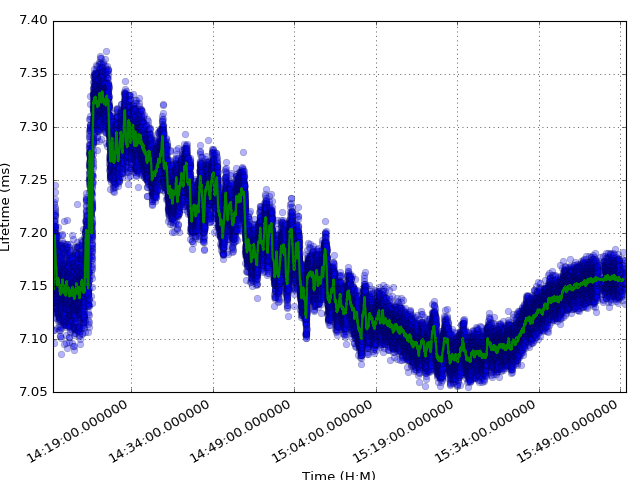

In [5]:
# Create plot of lifetime vs time
fig, ax = plt.subplots()
ax.plot(df['datetime'], df['tau'], 'o', alpha=0.3)
rolling = df['tau'].rolling(window=50, center=True).mean()
ax.plot(df['datetime'], rolling, '-', lw=2)  # label='rolling ({k})'.format(k=key)

# format the ticks
# ax.xaxis.set_major_locator(mdates.HourLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=np.arange(0, 60, flush_time)))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()  # Rotate slightly

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.xlabel('Time (H:M)')
plt.ylabel('Lifetime (ms)')
# plt.savefig("../Data/" + str(timestamp) + '/lifetimeVsTime.png', dpi=500)

# Drop Sweeps

In [6]:
# Drop first 600 sweeps (300 sweeps = 1 min @ 5HZ capture rate)
df = df[df.sweep_no > 600]
# df = df[df.sweep_no < 900]

# Each concentration vs lifetime (Rolling Mean)

In [7]:
plt.close("all")

In [8]:
grouped = df.groupby(['concentration'])

<IPython.core.display.Javascript object>


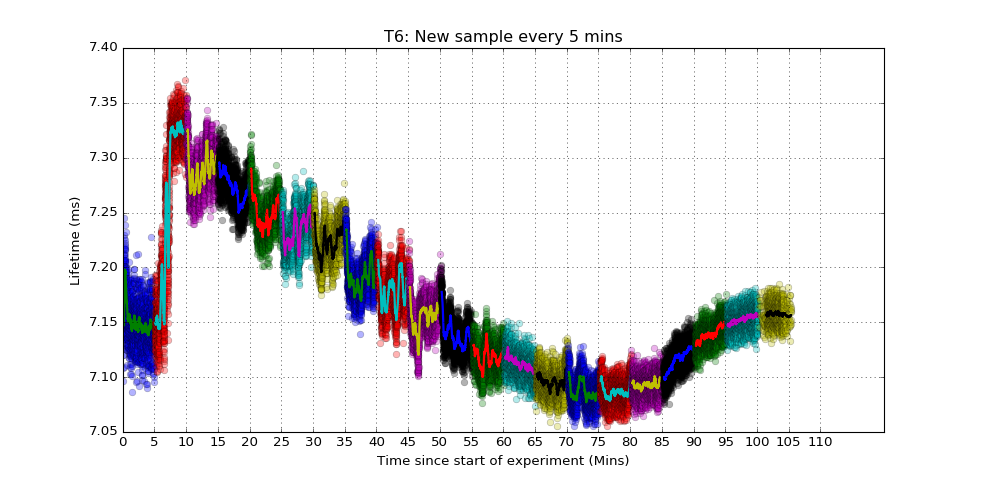

In [26]:
# All in one
fig, ax = plt.subplots()

for key, group in grouped:
    ax.plot(group['delta'], group['tau'], 'o', alpha=0.3, label=key)
    rolling = group['tau'].rolling(window=50).mean()
    ax.plot(group['delta'], rolling, '-', lw=2)  # label='rolling ({k})'.format(k=key)

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
plt.xticks(np.arange(0, max(df['delta'])+flush_time, flush_time))
# plt.xticks(np.arange(0, max(df['delta'])+1, flush_time))
# plt.legend(loc='best', ncol=3, fontsize='small')\
plt.xlabel('Time since start of experiment (Mins)')
plt.ylabel('Lifetime (ms)')
plt.title('T6: New sample every {:d} mins'.format(flush_time))
# plt.savefig('../Data/Plots/' + 'lifetimeVsTime.png', dpi=500)

<IPython.core.display.Javascript object>


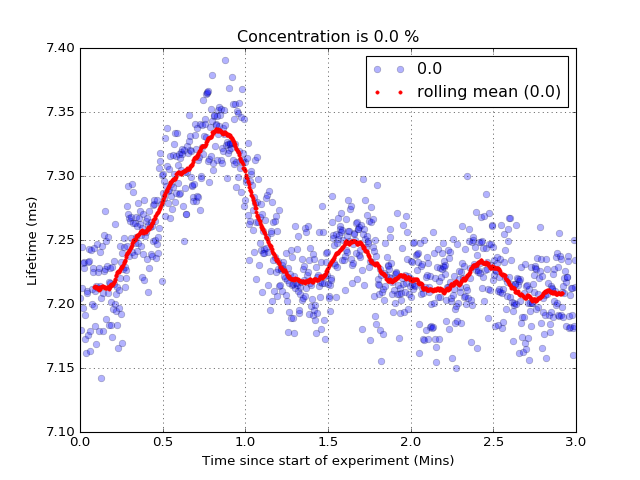

<IPython.core.display.Javascript object>


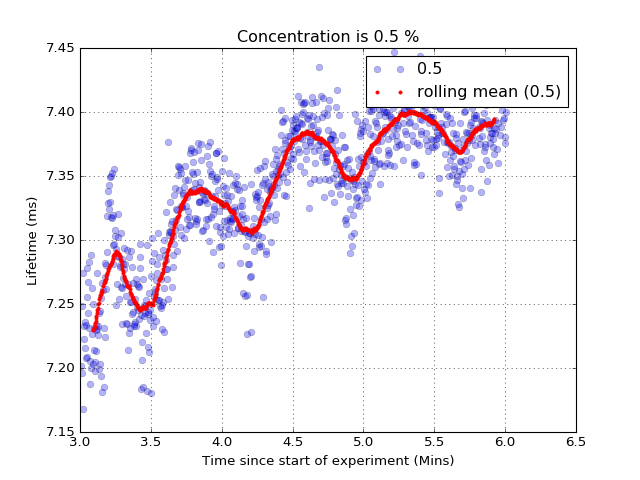

<IPython.core.display.Javascript object>


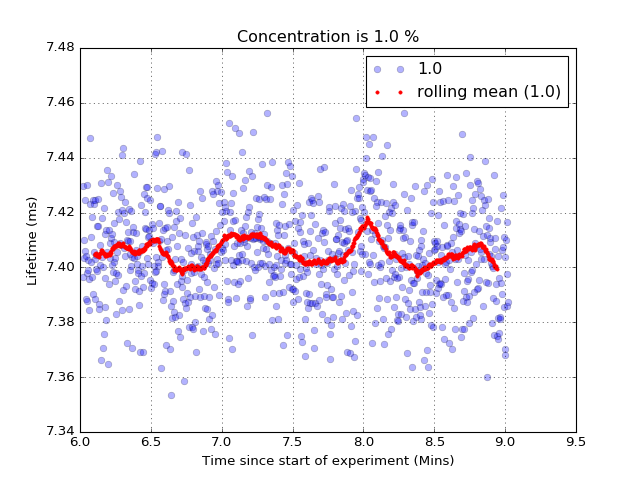

<IPython.core.display.Javascript object>


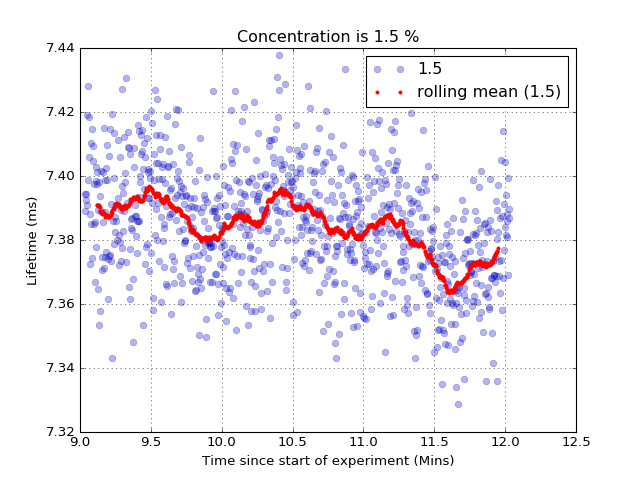

<IPython.core.display.Javascript object>


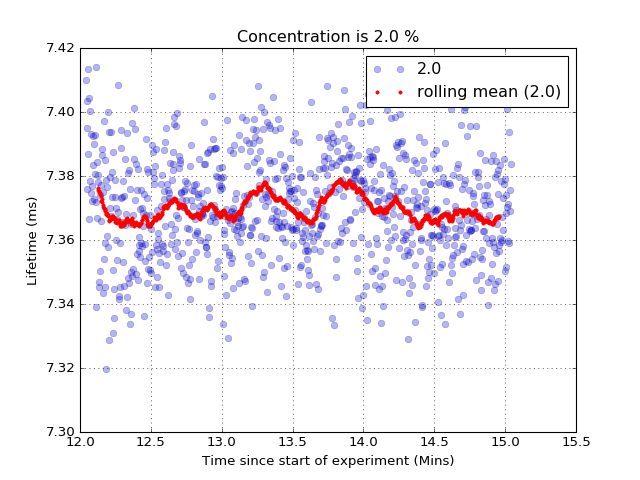

<IPython.core.display.Javascript object>


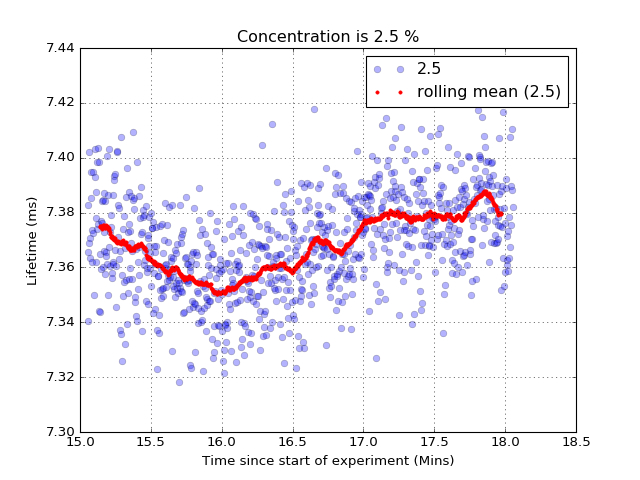

<IPython.core.display.Javascript object>


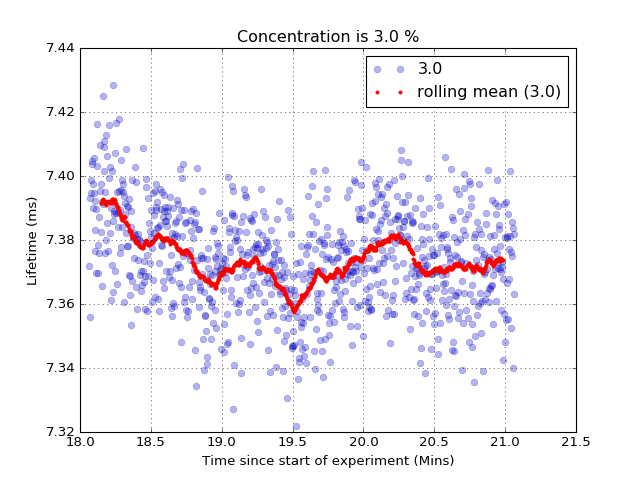

<IPython.core.display.Javascript object>


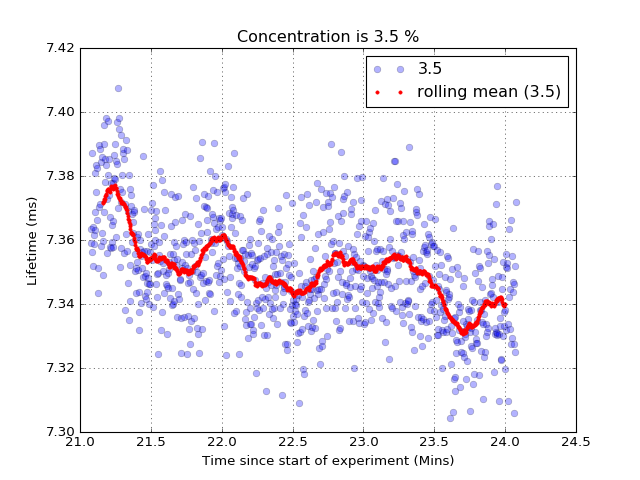

<IPython.core.display.Javascript object>


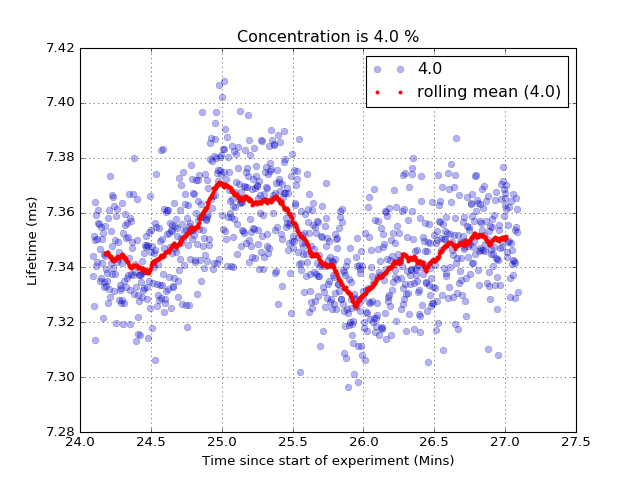

<IPython.core.display.Javascript object>


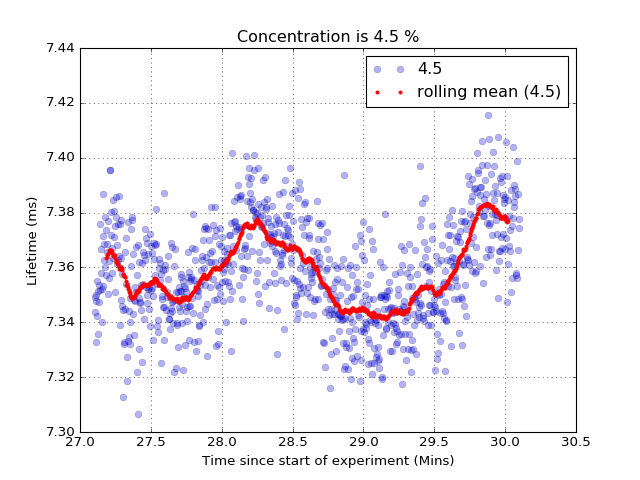

<IPython.core.display.Javascript object>


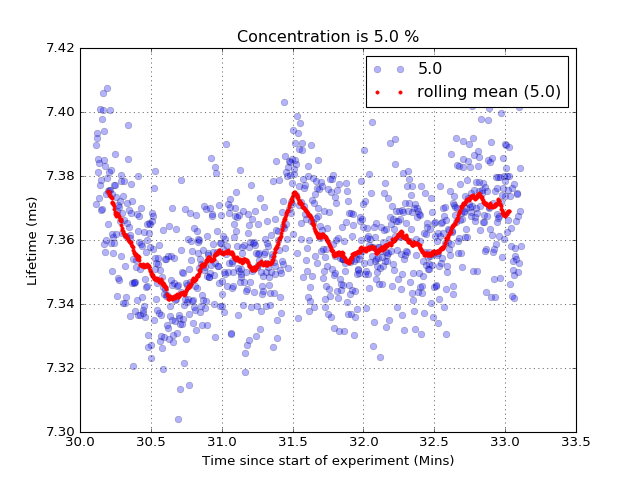

<IPython.core.display.Javascript object>


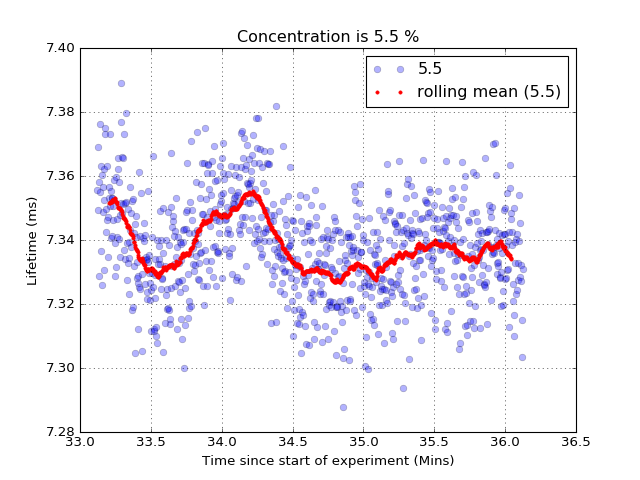

<IPython.core.display.Javascript object>


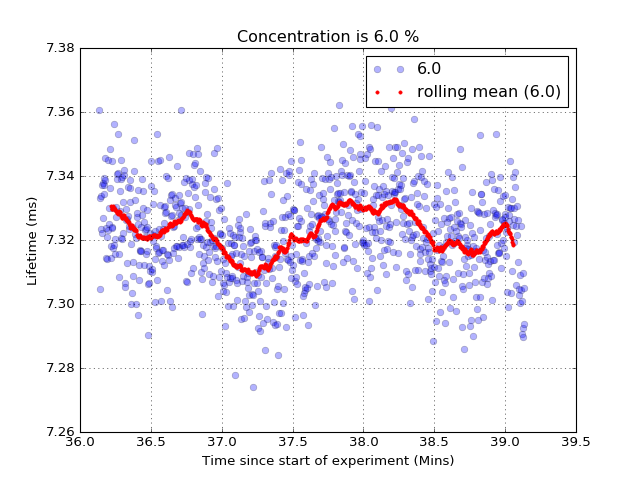

<IPython.core.display.Javascript object>


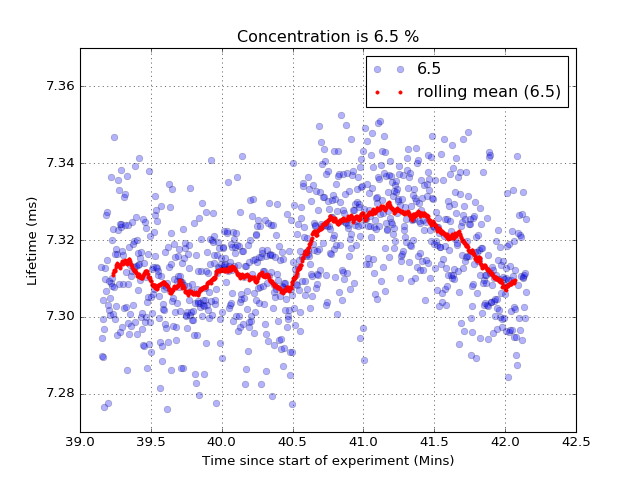

<IPython.core.display.Javascript object>


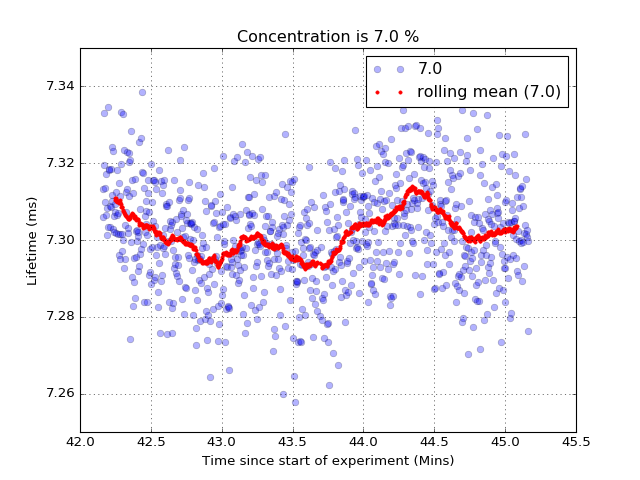

<IPython.core.display.Javascript object>


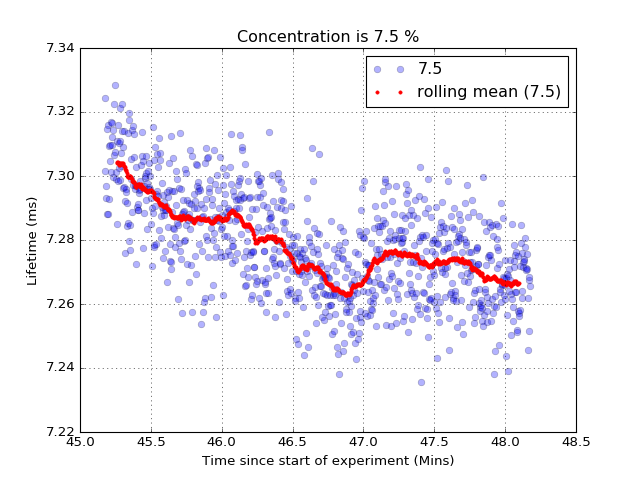

<IPython.core.display.Javascript object>


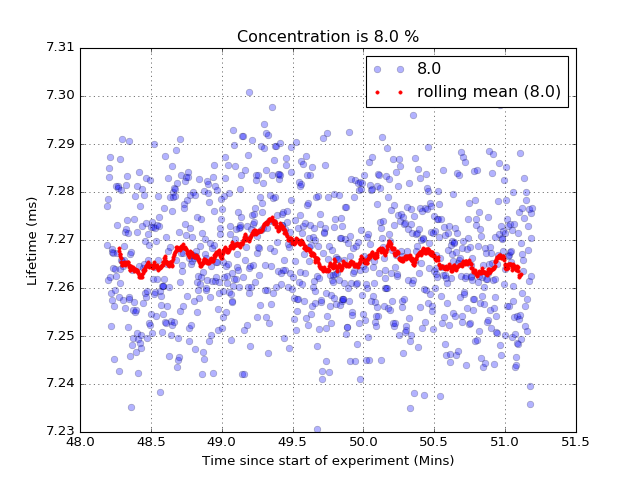

<IPython.core.display.Javascript object>


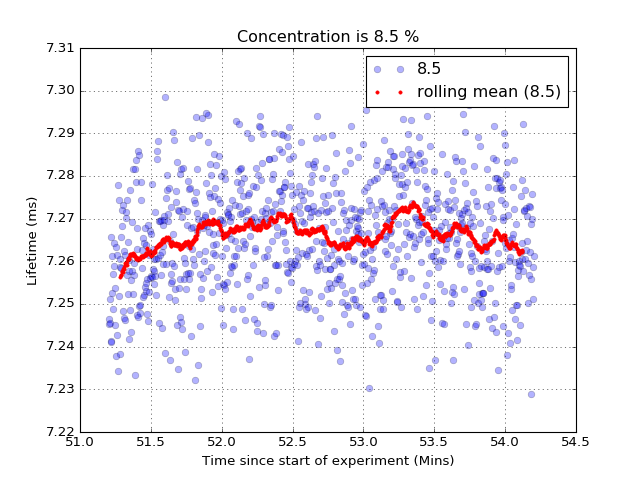

<IPython.core.display.Javascript object>


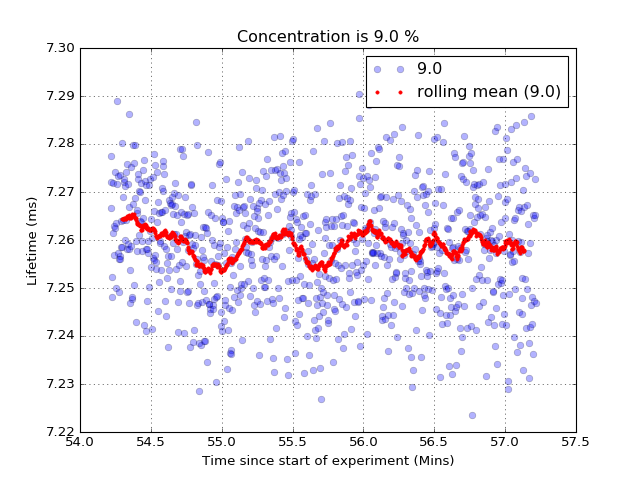

/Users/Thomas/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


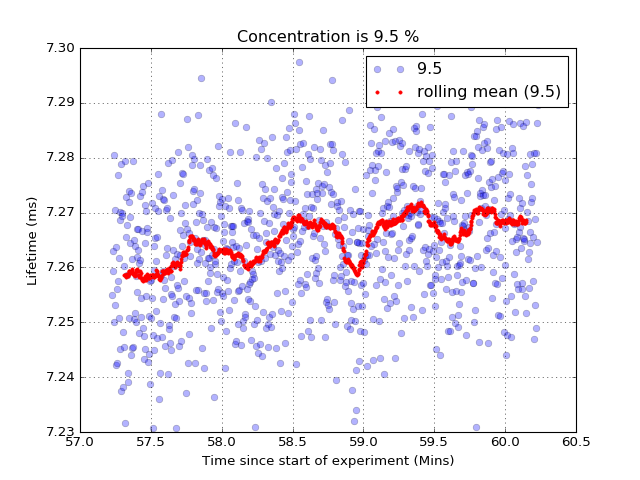

<IPython.core.display.Javascript object>


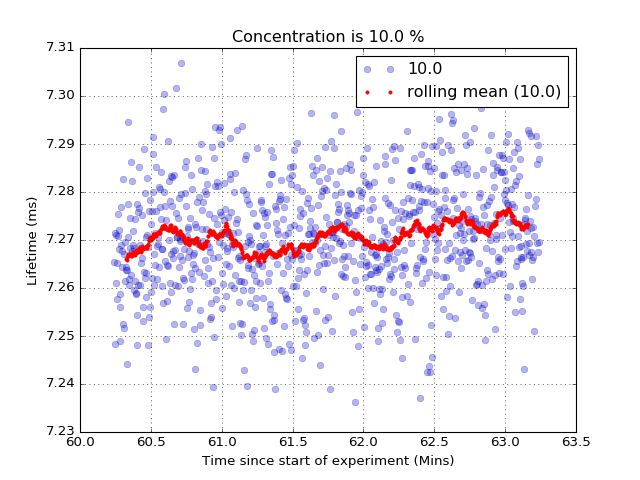

In [18]:
# Individual plots
for key, group in grouped:
    plt.figure()
    plt.plot(group['delta'], group['tau'], 'o', alpha=0.3, label=key)
    rolling = group['tau'].rolling(window=50, center=True).mean()
    plt.plot(group['delta'], rolling, '.', lw=3, color='red', label='rolling mean ({k})'.format(k=key)) 
    plt.title('Concentration is {} %'.format(key))
    plt.grid()
    plt.xlabel('Time since start of experiment (Mins)')
    plt.ylabel('Lifetime (ms)')
    plt.legend()
#     plt.savefig('../Data/Plots/' + str(key) + '.png', dpi=200)
#     pass

## tau & A vs concentration

In [9]:
# Apply mean and std functions to all collumns
g = grouped.agg([np.mean, np.std])

<IPython.core.display.Javascript object>


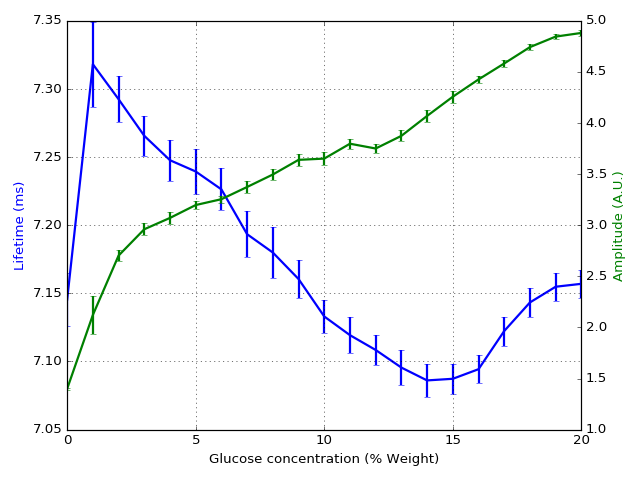

In [11]:
g = g.reset_index()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.errorbar(g['concentration'], g['tau']['mean'], yerr=g['tau']['std'], color='b', lw='2')
ax2.errorbar(g['concentration'], g['A']['mean'], yerr=g['A']['std'], color='g', lw='2')

ax1.set_xlabel('Glucose concentration (% Weight)')
ax1.set_ylabel('Lifetime (ms)', color='b')
ax2.set_ylabel('Amplitude (A.U.)', color='g')

ax1.grid()
plt.tight_layout()
ax1.ticklabel_format(useOffset=False, axis='y')
ax2.ticklabel_format(useOffset=False, axis='y')

plt.tight_layout()
# plt.title(df['chip'][0])
plt.savefig("../Data/Plots/together_T6" + '.png', dpi=600)

# Plot sensor data

In [ ]:
# Create plot of lifetime vs time
fig, ax = plt.subplots()
ax.plot(df['datetime'], df['tempC'], '-')
# ax.plot(df['datetime'], df['humidity'], '-')
# ax.plot(df['datetime'], df['tempC'], '-')

# format the ticks
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=np.arange(0, 60, flush_time)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()  # Rotate slightly

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.xlabel('Time (H:M)')
plt.ylabel('Lifetime (ms)')
plt.legend()
# plt.savefig("Data/" + str(timestamp) + '/lifetimeVsTime.png', dpi=500)

In [ ]:
# Create plot of lifetime vs time
fig, ax = plt.subplots()
ax.plot(df['datetime'], df['thermocouple_in'], '-')
ax.plot(df['datetime'], df['thermocouple_out'], '-')
# ax.plot(df['datetime'], df['tempC'], '-')

# format the ticks
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=np.arange(0, 60, flush_time)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()  # Rotate slightly

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.xlabel('Time (H:M)')
plt.ylabel('Lifetime (ms)')
plt.legend()
# plt.savefig("Data/" + str(timestamp) + '/lifetimeVsTime.png', dpi=500)

In [ ]:
r = df.set_index('delta').rolling(window=50)

fig, ax = plt.subplots()

ax.plot(r['thermocouple_in'].mean(), '-', lw=2)
ax.plot(r['thermocouple_out'].mean(), '-', lw=2)

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
# plt.xticks(np.arange(0, max(df['delta'])+1, flush_time))
plt.xticks(np.arange(0, max(df['delta'])+1, 1))
# plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.xlabel('Time since start of experiment (Mins)')
plt.ylabel('Temperature (degrees)')
plt.legend()
# plt.savefig("../Data/RollingMean.png", dpi=600)